# 🏠 **House Price Prediction with Machine Learning**

This project uses a machine learning model to predict house prices based on features like living area, quality, basement size, etc.

We explore the dataset, preprocess the data, visualize important features, and compare two models: Linear Regression and Random Forest Regressor.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import joblib  # For saving the model

## Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preprocessing

In [ ]:
# Select useful features
features = ['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'SalePrice']
df = df[features]

# Handle missing values
df = df.dropna()

## Visualize Correlations

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64


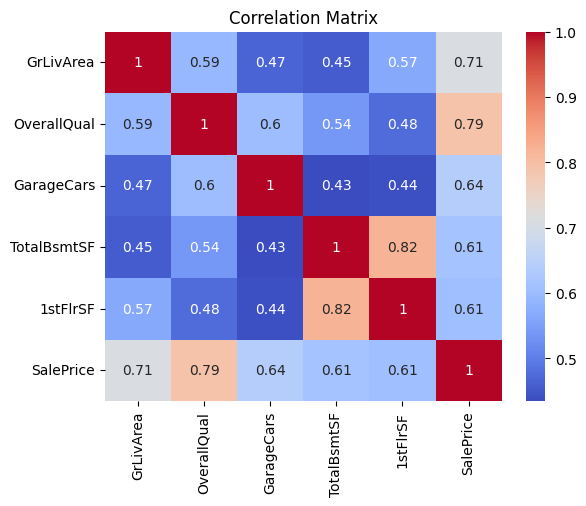

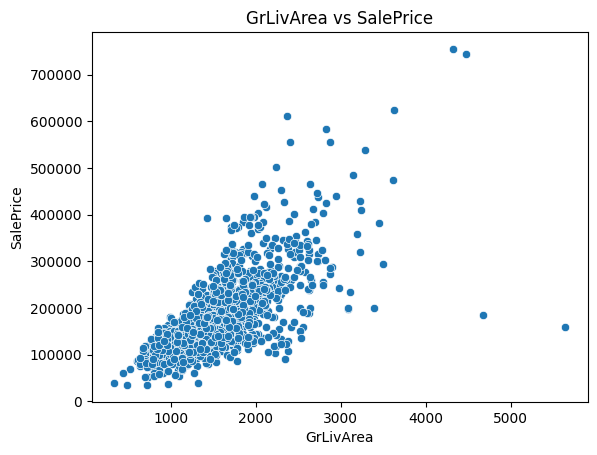

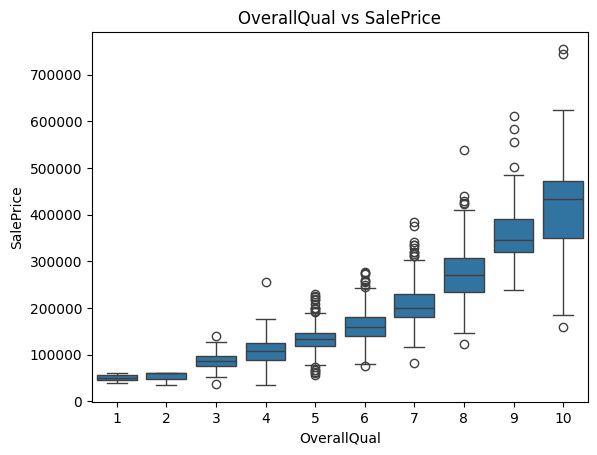

In [ ]:
# Correlation with SalePrice
corr = df.corr()['SalePrice'].sort_values(ascending=False)
print(corr)

# Plot correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter and box plots
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("GrLivArea vs SalePrice")
plt.show()

sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("OverallQual vs SalePrice")
plt.show()

## Split Data

In [ ]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression MSE: 1595555039.1611102
Linear Regression R²: 0.7919834181672654


## Train Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 877722021.6486785
Random Forest R²: 0.8855691403546502


## Feature Importance

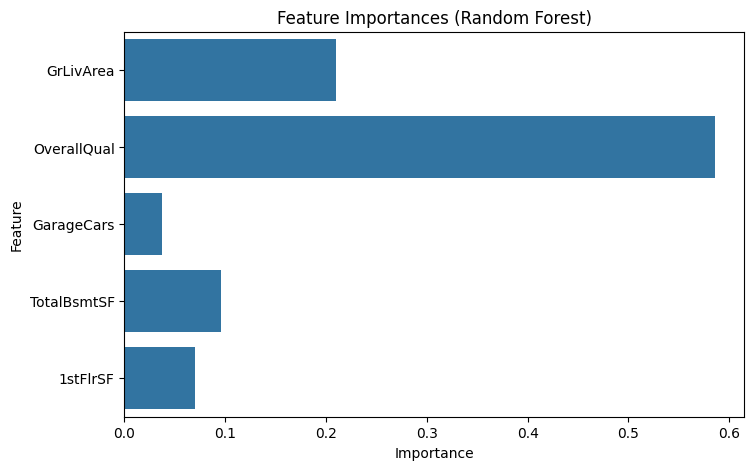

In [ ]:
importances = rf.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Save the Model

In [ ]:
joblib.dump(rf, "house_price_rf_model.pkl")

['house_price_rf_model.pkl']

## Conclusion

- Linear Regression R²: ~0.79  
- Random Forest R²: ~0.89 ✅  
- Random Forest clearly performs better on this dataset.

We also saw that features like `GrLivArea` and `OverallQual` had the most influence on house prices.

The model is saved and ready to be used in a real-world web application!


## Download the model

In [ ]:
from google.colab import files
files.download('house_price_rf_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>